## Práctica en aula: 

1. Hacer el grafo 
2. 

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
kmers = ["AGTT", "GTTG", "TTGA", "TGAC", "GACG", "ACGA", "CGAA", "GAAC", "AACG"]

In [9]:
def define_graph(kmers):
    graph = {}

    for mer in kmers:
        prefix = mer[:-1]
        suffix = mer[1:]

        graph[prefix] = suffix

    return graph

In [13]:
D = define_graph(kmers)
print(D)

{'AGT': 'GTT', 'GTT': 'TTG', 'TTG': 'TGA', 'TGA': 'GAC', 'GAC': 'ACG', 'ACG': 'CGA', 'CGA': 'GAA', 'GAA': 'AAC', 'AAC': 'ACG'}


In [22]:
def build_graph(graph):
    G = nx.DiGraph()

    for k, v in graph.items():
        label = k + v[-1]
        G.add_edge(k, v, label=label)

    return G

In [23]:
graph = build_graph(D)

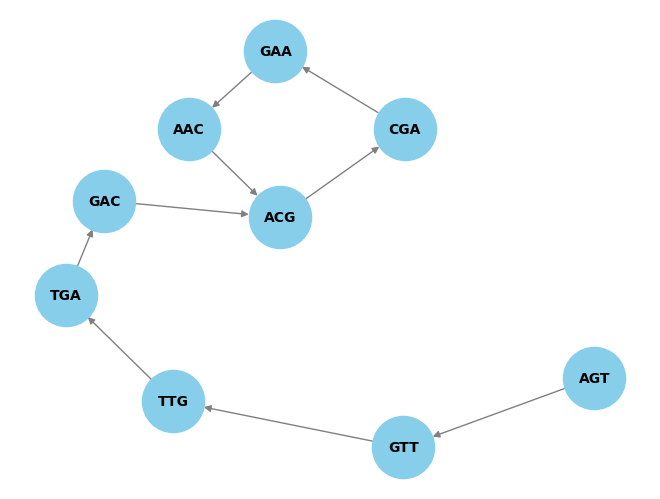

In [26]:
nx.draw(graph, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", font_color="black", edge_color="gray", pos=nx.spring_layout(graph))

In [27]:
# camino euleriano
nx.is_eulerian(graph)

eulerian_path = list(nx.eulerian_path(graph))

In [28]:
print(eulerian_path)

[('AGT', 'GTT'), ('GTT', 'TTG'), ('TTG', 'TGA'), ('TGA', 'GAC'), ('GAC', 'ACG'), ('ACG', 'CGA'), ('CGA', 'GAA'), ('GAA', 'AAC'), ('AAC', 'ACG')]


In [ ]:
def ensamble_sequence(eulerian_path):

    sequence = ""

    for arist in eulerian_path:
        sequence += a